In [20]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("student_assignment.csv")

In [3]:
data

,Age,Income,Is Student,Num Children,Temperature,Rating
0,43.0,45893.41,True,0.0,38.2,2.6
1,56.0,69663.07,True,1.0,38.7,3.2
2,NaN,45124.06,False,5.0,36.9,3.9
3,37.0,76724.60,False,2.0,41.6,2.5
4,53.0,58343.03,False,1.0,36.5,3.3
...,...,...,...,...,...,...
99,42.0,46673.04,False,5.0,38.8,10.9
100,35.0,27089.59,True,5.0,35.3,1.6
101,61.0,83082.63,True,4.0,35.6,3.7
102,39.0,61868.49,True,5.0,37.1,3.8


In [4]:
data.shape

(104, 6)

In [5]:
data.duplicated().sum()

3

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data

,Age,Income,Is Student,Num Children,Temperature,Rating
0,43.0,45893.41,True,0.0,38.2,2.6
1,56.0,69663.07,True,1.0,38.7,3.2
2,NaN,45124.06,False,5.0,36.9,3.9
3,37.0,76724.60,False,2.0,41.6,2.5
4,53.0,58343.03,False,1.0,36.5,3.3
...,...,...,...,...,...,...
96,48.0,90964.58,False,2.0,38.9,3.9
97,58.0,70679.33,True,4.0,41.3,4.8
98,50.0,97052.37,True,2.0,37.1,4.6
99,42.0,46673.04,False,5.0,38.8,10.9


In [9]:
data.isna().sum()

Age             1
Income          0
Is Student      0
Num Children    3
Temperature     0
Rating          0
dtype: int64

In [10]:
data["Age"].mean()

53.31

In [11]:
data["Age"].median()

42.0

<Axes: >

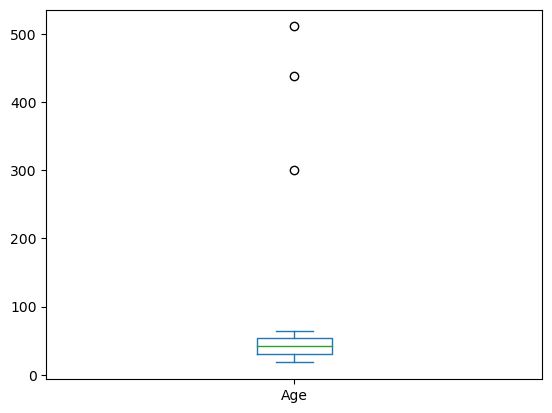

In [13]:
data['Age'].plot(kind= 'box')

In [14]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [15]:
data.isna().sum()

Age             0
Income          0
Is Student      0
Num Children    3
Temperature     0
Rating          0
dtype: int64

In [16]:
#Detecting outlier with z-score
outliers=[]
def detect_outlier(insurance):
    
    threshold=3
    mean_1 = np.mean(insurance)
    std_1 = np.std(insurance)
    
    
    for y in insurance:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [18]:
data['Age'] = data['Age'].astype('int')

In [21]:
data.select_dtypes(include=np.number).apply(detect_outlier)

,Age,Income,Num Children,Temperature,Rating
0,511.0,511.0,511.0,511.0,511.0
1,301.0,301.0,301.0,301.0,301.0
2,438.0,438.0,438.0,438.0,438.0
3,40.0,40.0,40.0,40.0,40.0
4,-3.2,-3.2,-3.2,-3.2,-3.2
5,10.9,10.9,10.9,10.9,10.9


In [22]:
#Script to find the outliers
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])

Age
Outliers =  7     511
19    301
47    438
Name: Age, dtype: int32
Income
Outliers =  Series([], Name: Income, dtype: float64)
Num Children
Outliers =  82    40.0
Name: Num Children, dtype: float64
Temperature
Outliers =  Series([], Name: Temperature, dtype: float64)


In [23]:
#Removed the age outlier
data = data[~(data['Age']>100)]

In [24]:
data.shape

(98, 6)

<Axes: >

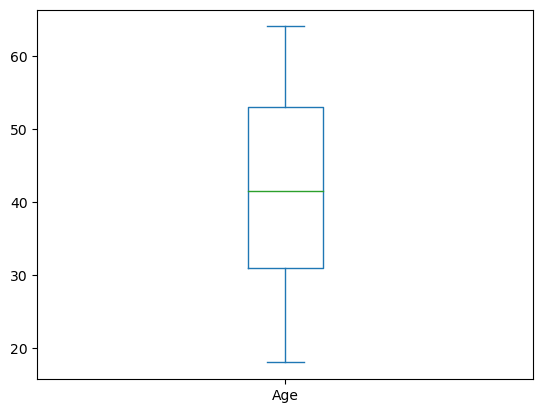

In [25]:
data['Age'].plot(kind = 'box')

In [32]:
data.dropna(subset="Num Children", inplace=True)

C:\Users\vigne\AppData\Local\Temp\ipykernel_13040\2846190439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset="Num Children", inplace=True)


In [33]:
data.isna().sum()

Age             0
Income          0
Is Student      0
Num Children    0
Temperature     0
Rating          0
dtype: int64

In [34]:
data

,Age,Income,Is Student,Num Children,Temperature,Rating
0,43,45893.41,True,0.0,38.2,2.6
1,56,69663.07,True,1.0,38.7,3.2
2,42,45124.06,False,5.0,36.9,3.9
3,37,76724.60,False,2.0,41.6,2.5
4,53,58343.03,False,1.0,36.5,3.3
...,...,...,...,...,...,...
96,48,90964.58,False,2.0,38.9,3.9
97,58,70679.33,True,4.0,41.3,4.8
98,50,97052.37,True,2.0,37.1,4.6
99,42,46673.04,False,5.0,38.8,10.9


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 101
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           96 non-null     int32  
 1   Income        96 non-null     float64
 2   Is Student    96 non-null     object 
 3   Num Children  96 non-null     float64
 4   Temperature   96 non-null     float64
 5   Rating        96 non-null     float64
dtypes: float64(4), int32(1), object(1)
memory usage: 4.9+ KB


In [36]:
data_num = data.select_dtypes(include = np.number)

In [37]:
data_num

,Age,Income,Num Children,Temperature,Rating
0,43,45893.41,0.0,38.2,2.6
1,56,69663.07,1.0,38.7,3.2
2,42,45124.06,5.0,36.9,3.9
3,37,76724.60,2.0,41.6,2.5
4,53,58343.03,1.0,36.5,3.3
...,...,...,...,...,...
96,48,90964.58,2.0,38.9,3.9
97,58,70679.33,4.0,41.3,4.8
98,50,97052.37,2.0,37.1,4.6
99,42,46673.04,5.0,38.8,10.9


In [38]:
data_cat = data.select_dtypes(exclude = np.number)

In [39]:
data_cat

,Is Student
0,True
1,True
2,False
3,False
4,False
...,...
96,False
97,True
98,True
99,False


In [42]:
data_cat['Is Student'].replace({'YES':'True','Yes':'True','NO':'False','false':'False', 'true':'True'}, inplace = True)

In [43]:
data_cat['Is Student'].unique()

array(['True', 'False'], dtype=object)

In [44]:
data_isStudent_cat = pd.get_dummies(data_cat['Is Student'])

In [45]:
data_isStudent_cat

,False,True
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
96,1,0
97,0,1
98,0,1
99,1,0


In [46]:
pd.concat([data_num, data_isStudent_cat], axis = 1)

,Age,Income,Num Children,Temperature,Rating,False,True
0,43,45893.41,0.0,38.2,2.6,0,1
1,56,69663.07,1.0,38.7,3.2,0,1
2,42,45124.06,5.0,36.9,3.9,1,0
3,37,76724.60,2.0,41.6,2.5,1,0
4,53,58343.03,1.0,36.5,3.3,1,0
...,...,...,...,...,...,...,...
96,48,90964.58,2.0,38.9,3.9,1,0
97,58,70679.33,4.0,41.3,4.8,0,1
98,50,97052.37,2.0,37.1,4.6,0,1
99,42,46673.04,5.0,38.8,10.9,1,0
